In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
boston = load_boston()

In [3]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)

In [4]:
missing_value_count = df.isnull().sum()
total_missing = missing_value_count.sum()
total_value = np.product(df.shape)
(total_missing/total_value)*100

0.0

In [5]:
df['output'] = boston.target
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

# Selecting one feature

In [6]:
df1 = df[['AGE', 'output']]

In [7]:
X = df1.drop('output', axis = 1)
y = df1['output'].copy()

In [8]:
boston_x_train, boston_x_test, boston_y_train, boston_y_test = train_test_split(X, y, test_size = 0.20, random_state = 41) 

In [9]:
print(boston_x_train.shape)
print(boston_x_test.shape)
print(boston_y_train.shape)
print(boston_y_test.shape)

(404, 1)
(102, 1)
(404,)
(102,)


In [10]:
regr = linear_model.LinearRegression()

In [11]:
regr.fit(boston_x_train, boston_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
boston_y_pred = regr.predict(boston_x_test)

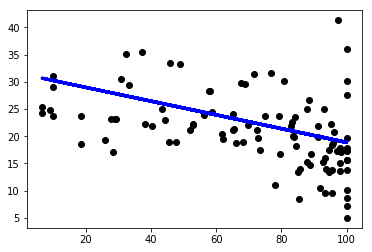

In [13]:
plt.scatter(boston_x_test, boston_y_test,  color='black')
plt.plot(boston_x_test, boston_y_pred, color='blue', linewidth=3)
plt.show()

In [14]:
print("Mean squared error: %.2f"
      % mean_squared_error(boston_y_test, boston_y_pred))

Mean squared error: 40.18


In [15]:
print('Variance score: %.2f' % r2_score(boston_y_test, boston_y_pred))

Variance score: 0.13


# Selecting more than one features

In [16]:
df2 = df[['AGE', 'B', 'LSTAT','output']]

In [17]:
X = df2.drop('output', axis = 1)
y = df2['output'].copy()

In [18]:
boston_x_train, boston_x_test, boston_y_train, boston_y_test = train_test_split(X, y, test_size = 0.20, random_state = 41) 

In [19]:
print(boston_x_train.shape)
print(boston_x_test.shape)
print(boston_y_train.shape)
print(boston_y_test.shape)

(404, 3)
(102, 3)
(404,)
(102,)


In [20]:
regr = linear_model.LinearRegression()

In [21]:
regr.fit(boston_x_train, boston_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
boston_y_pred = regr.predict(boston_x_test)

In [23]:
print("Mean squared error: %.2f"
      % mean_squared_error(boston_y_test, boston_y_pred))

Mean squared error: 34.28


In [24]:
print('Variance score: %.2f' % r2_score(boston_y_test, boston_y_pred))

Variance score: 0.26
